In [3]:
import os, sys

current_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(current_dir, '..'))
if root_dir not in sys.path:
    sys.path.insert(0, root_dir)


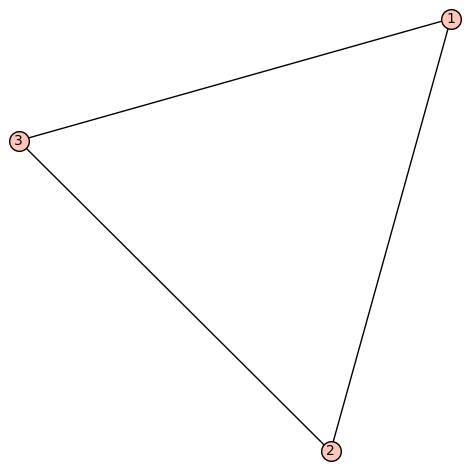

In [ ]:
from sage.all import Graph, plot

G = Graph([(1,2), (2,3), (3,1)])
G.plot(vertex_labels=True).show()

3.306493779875511 -0.806493779875511


TypeError: Don't know a PDF representation for <class 'sage.rings.real_mpfr.RealLiteral'> objects

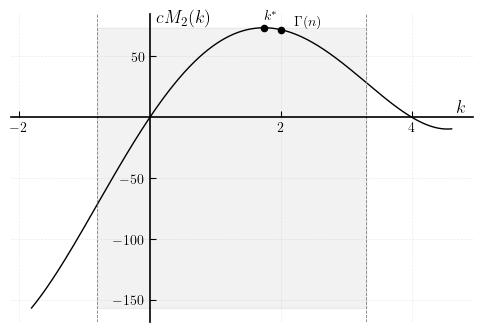

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from src import (
    cM2, func, optimal_k, convex_from, convex_up_to,
)

n = 5
x__func = func(n)
x__convex_from = convex_from(n).real
x__convex_up_to = convex_up_to(n).real
x__optimal_k = optimal_k(n)
X = np.linspace(x__convex_up_to - 1, x__convex_from + 1.3, 1000)
Y__cM2 = np.array([float(cM2(n, k)) for k in X])
print(x__convex_from, x__convex_up_to)

# ---------------- MINIMALISTIC PLOT ----------------
import numpy as np
import matplotlib.pyplot as plt

# --- LaTeX aesthetic ---
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
    "axes.spines.right": False,
    "axes.spines.top": False
})

fig, ax = plt.subplots(figsize=(5, 3.5))

# === Main curve (thinner) ===
ax.plot(
    X, Y__cM2,
    color="black",
    linewidth=1.0,  # thinner
    label=rf"$cM_2(n,{n})$"
)

# === Vertical reference lines (thinner) ===
line_style = {"color": "gray", "linestyle": "--", "linewidth": 0.6}
ax.axvline(x__convex_from, **line_style)
ax.axvline(x__convex_up_to, **line_style)

# === Shaded area between two dotted lines ===
ax.fill_between(X, Y__cM2.min(), Y__cM2.max(),
                where=(X >= x__convex_up_to) & (X <= x__convex_from),
                color="gray", alpha=0.1)

# === Plot key points on the curve (smaller markers) ===
k_points = [x__func, x__optimal_k]
y_points = [cM2(n, x) for x in k_points]
ax.scatter(k_points, y_points, color="black", s=20, zorder=5)  # smaller points

# Add labels next to points
offset = 0.2
ax.text(x__func, y_points[0] + 5, r"$k^*$", va='bottom', ha='left', fontsize=10, color='black')
ax.text(x__optimal_k + offset, y_points[1], r"$\Gamma(n)$", va='bottom', ha='left', fontsize=10, color='black')

# X-axis
xticks = ax.get_xticks()              # get current tick positions
xticks = [x for x in xticks if x != 0]  # remove 0
ax.set_xticks(xticks)

# Y-axis
yticks = ax.get_yticks()
yticks = [y for y in yticks if y != 0]
ax.set_yticks(yticks)

# === Axes styling ===
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["bottom"].set_linewidth(1.2)
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Light grid
ax.grid(True, color="gray", alpha=0.15, linestyle="--", linewidth=0.5)

# Ticks (prevent overlapping)
ax.tick_params(direction="in", length=4, width=0.8, colors="black", labelsize=10)
ax.locator_params(axis='x', nbins=6)  # fewer x-axis ticks
ax.locator_params(axis='y', nbins=6)  # fewer y-axis ticks

# Axis labels on axes
ax.text(X[-1] + 0.2, np.max(Y__cM2)*0.19, r"$k$", va='top', ha='right', fontsize=13, color='black')
ax.text(0.1, np.max(Y__cM2), r"$cM_2(k)$", va='bottom', ha='left', fontsize=13, color='black')


plt.tight_layout()
plt.savefig("images/cM2_plot.pgf")
plt.savefig("images/cM2_plot.pdf", bbox_inches='tight')
plt.show()


TypeError: Don't know a PDF representation for <class 'sage.rings.real_mpfr.RealLiteral'> objects

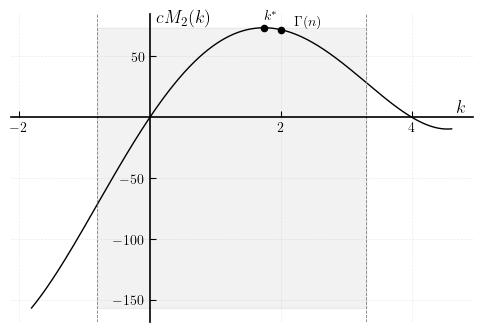

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from src import cM2, func, optimal_k, convex_from, convex_up_to

n = 5

x_func = float(func(n))
x_from = float(convex_from(n).real)
x_up_to = float(convex_up_to(n).real)
x_opt = float(optimal_k(n))

X = np.linspace(x_up_to - 1.0, x_from + 1.3, 1000, dtype=float)
Y_cM2 = np.array([float(cM2(n, float(k))) for k in X], dtype=float)

k_points = np.array([x_func, x_opt], dtype=float)
y_points = np.array([float(cM2(n, float(k))) for k in k_points], dtype=float)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
    "axes.spines.right": False,
    "axes.spines.top": False
})

fig, ax = plt.subplots(figsize=(5, 3.5))

ax.plot(X, Y_cM2, color="black", linewidth=1.0)
ax.scatter(k_points, y_points, color="black", s=20, zorder=5)

line_style = {"color": "gray", "linestyle": "--", "linewidth": 0.6}
ax.axvline(float(x_from), **line_style)
ax.axvline(float(x_up_to), **line_style)

ax.fill_between(
    X, float(np.min(Y_cM2)), float(np.max(Y_cM2)),
    where=(X >= float(x_up_to)) & (X <= float(x_from)),
    color="gray", alpha=0.1
)

offset = 0.2
ax.text(float(k_points[0]), float(y_points[0] + 5.0), r"$k^*$", va='bottom', ha='left', fontsize=10)
ax.text(float(k_points[1] + offset), float(y_points[1]), r"$\Gamma(n)$", va='bottom', ha='left', fontsize=10)

xticks = [float(x) for x in ax.get_xticks() if x != 0]
yticks = [float(y) for y in ax.get_yticks() if y != 0]
ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["bottom"].set_linewidth(1.2)
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(True, color="gray", alpha=0.15, linestyle="--", linewidth=0.5)
ax.tick_params(direction="in", length=4, width=0.8, colors="black", labelsize=10)
ax.locator_params(axis='x', nbins=6)
ax.locator_params(axis='y', nbins=6)

ax.text(float(X[-1] + 0.2), float(np.max(Y_cM2) * 0.19), r"$k$", va='top', ha='right', fontsize=13)
ax.text(float(0.1), float(np.max(Y_cM2)), r"$cM_2(k)$", va='bottom', ha='left', fontsize=13)

plt.tight_layout()
plt.savefig("images/cM2_plot.pdf", bbox_inches='tight')
plt.savefig("images/cM2_plot.pgf")
plt.show()
